# Library

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import imblearn
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Import Dataset

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

inq_fi                         100.000000
open_rv_24m                    100.000000
max_bal_bc                     100.000000
all_util                       100.000000
inq_last_12m                   100.000000
annual_inc_joint               100.000000
verification_status_joint      100.000000
dti_joint                      100.000000
total_cu_tl                    100.000000
il_util                        100.000000
mths_since_rcnt_il             100.000000
total_bal_il                   100.000000
open_il_24m                    100.000000
open_il_12m                    100.000000
open_il_6m                     100.000000
open_acc_6m                    100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981975
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
tot_coll_amt                    15

In [5]:
# Drop kolom yang missing > 40%
cols_to_drop = check_missing[check_missing > 40].index
df = df.drop(columns=cols_to_drop)

In [6]:
# drop kolom identitas
df = df.drop(columns=['Unnamed: 0','id','member_id'])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [7]:
df.loan_status.value_counts(normalize=True)*100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64

Saya menggunakan fitur loan_status sebagai dasar dalam penentuan data target (good loan atau bad loan).

Fitur loan_status memiliki beberapa nilai
- Current artinya pembayaran lancar 
- Fully Paid artinya pembayaran lunas
- Charged Off artinya pembayaran macet sehingga dihapusbukukan
- Late artinya pembayaran telat dilakukan
- In Grace Period artinya dalam masa tenggang
- Default artinya pembayaran macet

Pada project ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan. Di mana artinya :
- Good loan ketika loan_status adalah 'Current', 'Fully Paid', atau 'Does not meet the credit policy. Status: Fully Paid'
- Bad loan ketika loan_status adalah 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', atau 'Does not meet the credit policy. Status: Charged Off'

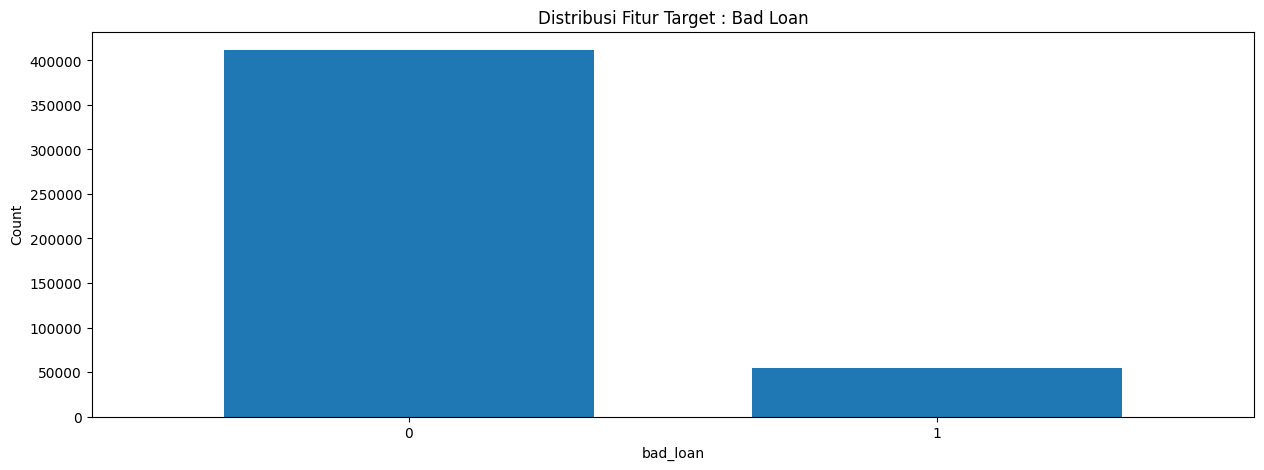

In [8]:
# membuat fitur baru sebagai fitur target yaitu fitur 'bad_loan'
bad_status = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status: Charged Off']
df['bad_loan'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

# hapus fitur asal yaitu 'loan_status'
df.drop('loan_status', axis=1, inplace=True)

# melihat distribusi fitur target

bad_loan_counts = df['bad_loan'].value_counts()

plt.figure(figsize=(15, 5))
bad_loan_counts.plot(kind='bar', width=0.7)
plt.title('Distribusi Fitur Target : Bad Loan')
plt.xlabel('bad_loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

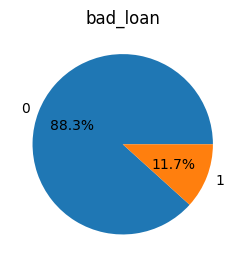

In [9]:
plt.subplot(122)
plt.pie(df.bad_loan.value_counts(), labels = df.bad_loan.value_counts().index, autopct = "%1.1f%%")
plt.title('bad_loan')

plt.show()

Pada fitur target terdapat 2 unique value :
- 0 = Good loan (peminjaman tidak berpotensi merugikan)
- 1 = Bad loan (peminjaman berpotensi merugikan)

Pada distribusi di atas, dapat disimpulkan bahwa data target mengalami class imbalance. Hal ini harus dihandle sebelum memasuki tahap modeling nantinya

# Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["bad_loan"]),
    df["bad_loan"],
    test_size=0.2,
    random_state=42,
    stratify=df["bad_loan"],
)
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
404301,7500,7500,7500.000000,36 months,12.49,250.87,B,B4,Network Engineer,1 year,RENT,118000.0,Source Verified,Apr-14,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,206xx,MD,6.14,0.0,Dec-02,0.0,4.0,0.0,3450,86.2,5.0,f,3679.79,3679.79,5017.400000,5017.40,3820.21,1197.19,0.0,0.0,0.0,Dec-15,250.87,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,16813.0,4000.0
420063,28000,28000,28000.000000,60 months,14.16,653.84,C,C2,Nurse Administrator,10+ years,MORTGAGE,175000.0,Not Verified,Mar-14,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,560xx,MN,15.70,0.0,Feb-87,1.0,23.0,0.0,41854,64.5,45.0,f,20343.07,20343.07,13730.640000,13730.64,7656.93,6073.71,0.0,0.0,0.0,Dec-15,653.84,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,322072.0,112200.0
406708,6600,6600,6600.000000,36 months,12.99,222.35,B,B5,overnight maintenance,10+ years,OWN,29000.0,Source Verified,Apr-14,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,447xx,OH,16.14,1.0,Oct-01,2.0,5.0,0.0,4836,59.7,20.0,f,0.00,0.00,6809.420000,6809.42,6600.00,209.42,0.0,0.0,0.0,Jul-14,6364.72,Jul-14,0.0,1,INDIVIDUAL,0.0,0.0,4836.0,8100.0
30705,5000,5000,4062.370474,36 months,7.51,155.55,A,A4,NaN,4 years,MORTGAGE,40000.0,Not Verified,Apr-10,n,https://www.lendingclub.com/browse/loanDetail....,small_business,SCHOOL LOAN,331xx,FL,17.52,0.0,Jan-92,5.0,15.0,0.0,5450,11.8,44.0,f,0.00,0.00,5564.070000,4495.13,5000.00,564.07,0.0,0.0,0.0,Sep-12,1375.96,Sep-12,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
107244,12000,12000,12000.000000,60 months,15.22,286.87,C,C3,Exel,7 years,MORTGAGE,130000.0,Verified,Aug-13,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt and Medical Consolidation,261xx,WV,11.07,1.0,Oct-01,0.0,11.0,3.0,3851,30.1,21.0,w,0.00,0.00,14685.670000,14685.67,12000.00,2685.67,0.0,0.0,0.0,Mar-15,9522.01,Apr-15,0.0,1,INDIVIDUAL,0.0,0.0,390701.0,12800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459554,5000,5000,5000.000000,36 months,13.53,169.75,B,B5,Pharmacy Technician,10+ years,OWN,67784.0,Source Verified,Jan-14,n,https://www.lendingclub.com/browse/loanDetail....,other,Other,442xx,OH,18.86,0.0,Nov-84,0.0,14.0,0.0,60943,19.0,17.0,w,0.00,0.00,5460.124698,5460.12,5000.00,460.12,0.0,0.0,0.0,Oct-14,4102.12,Sep-15,0.0,1,INDIVIDUAL,0.0,0.0,68085.0,142600.0
305929,35000,35000,35000.000000,60 months,18.99,907.73,E,E1,"Director, Public Relations",10+ years,OWN,157000.0,Verified,Sep-14,n,https://www.lendingclub.com/browse/loanDetail....,other,Other,452xx,OH,8.59,0.0,Nov-94,0.0,12.0,0.0,30449,79.7,40.0,w,0.00,0.00,37974.980000,37974.98,35000.00,2974.98,0.0,0.0,0.0,Feb-15,34344.06,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,272414.0,38200.0
462766,10000,10000,10000.000000,36 months,6.62,307.04,A,A2,Supervisor,2 years,MORTGAGE,47000.0,Verified,Jan-14,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,986xx,WA,13.66,0.0,Dec-99,0.0,10.0,0.0,10768,57.0,32.0,f,3842.27,3842.27,7073.420000,7073.42,6157.73,915.69,0.0,0.0,0.0,Dec-15,307.04,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,184222.0,18900.0
329824,35000,35000,35000.000000,36 months,14.49,1204.57,C,C4,Group Account Director,< 1 year,MORTGAGE,100000.0,Verified,Aug-14,n,https://www.le

In [11]:
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

bad_loan
0    88.296589
1    11.703411
Name: proportion, dtype: float64
bad_loan
0    88.296857
1    11.703143
Name: proportion, dtype: float64


# EDA

In [12]:
X_train['emp_length'].unique() # kategorik

array(['1 year', '10+ years', '4 years', '7 years', '< 1 year', '3 years',
       '6 years', '9 years', '5 years', '8 years', nan, '2 years'],
      dtype=object)

In [13]:
X_train['term'].unique() # kategorik

array([' 36 months', ' 60 months'], dtype=object)

In [14]:
X_train['issue_d'].head()

404301    Apr-14
420063    Mar-14
406708    Apr-14
30705     Apr-10
107244    Aug-13
Name: issue_d, dtype: object

In [15]:
X_train['last_pymnt_d'].head()

404301    Dec-15
420063    Dec-15
406708    Jul-14
30705     Sep-12
107244    Mar-15
Name: last_pymnt_d, dtype: object

In [16]:
X_train['last_credit_pull_d'].head()

404301    Jan-16
420063    Jan-16
406708    Jul-14
30705     Sep-12
107244    Apr-15
Name: last_credit_pull_d, dtype: object

In [17]:
# cek banyak unique values pada tiap fitur kategorik
X_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

url                    373028
emp_title              170117
title                   52144
zip_code                  879
earliest_cr_line          656
last_credit_pull_d        102
last_pymnt_d               98
issue_d                    91
addr_state                 50
sub_grade                  35
purpose                    14
emp_length                 11
grade                       7
home_ownership              6
verification_status         3
term                        2
pymnt_plan                  2
initial_list_status         2
application_type            1
dtype: int64

In [18]:
# melihat unique value dalam persen pada tiap fitur kategorik
for col in X_train.select_dtypes(include='object').columns.tolist():
    print(X_train[col].value_counts(normalize=True)*100)
    print('\n')

term
36 months    72.462389
60 months    27.537611
Name: proportion, dtype: float64


grade
B    29.340693
C    26.829353
D    16.495276
A    16.092358
E     7.691648
F     2.827670
G     0.723002
Name: proportion, dtype: float64


sub_grade
B3    6.784745
B4    6.527660
C1    5.772757
C2    5.741124
B2    5.727988
C3    5.418092
B5    5.402007
C4    5.143046
B1    4.898292
C5    4.754335
A5    4.674448
D1    4.136955
A4    4.097816
D2    3.650396
D3    3.212896
D4    3.024170
A3    2.717222
D5    2.470860
A2    2.339771
A1    2.263101
E1    1.947307
E2    1.870637
E3    1.487020
E4    1.286499
E5    1.100186
F1    0.835862
F2    0.636413
F3    0.585211
F4    0.442594
F5    0.327589
G1    0.246898
G2    0.176394
G3    0.124387
G4    0.093291
G5    0.082031
Name: proportion, dtype: float64


emp_title
Teacher                                  1.230839
Manager                                  1.014303
Registered Nurse                         0.533364
RN                                    

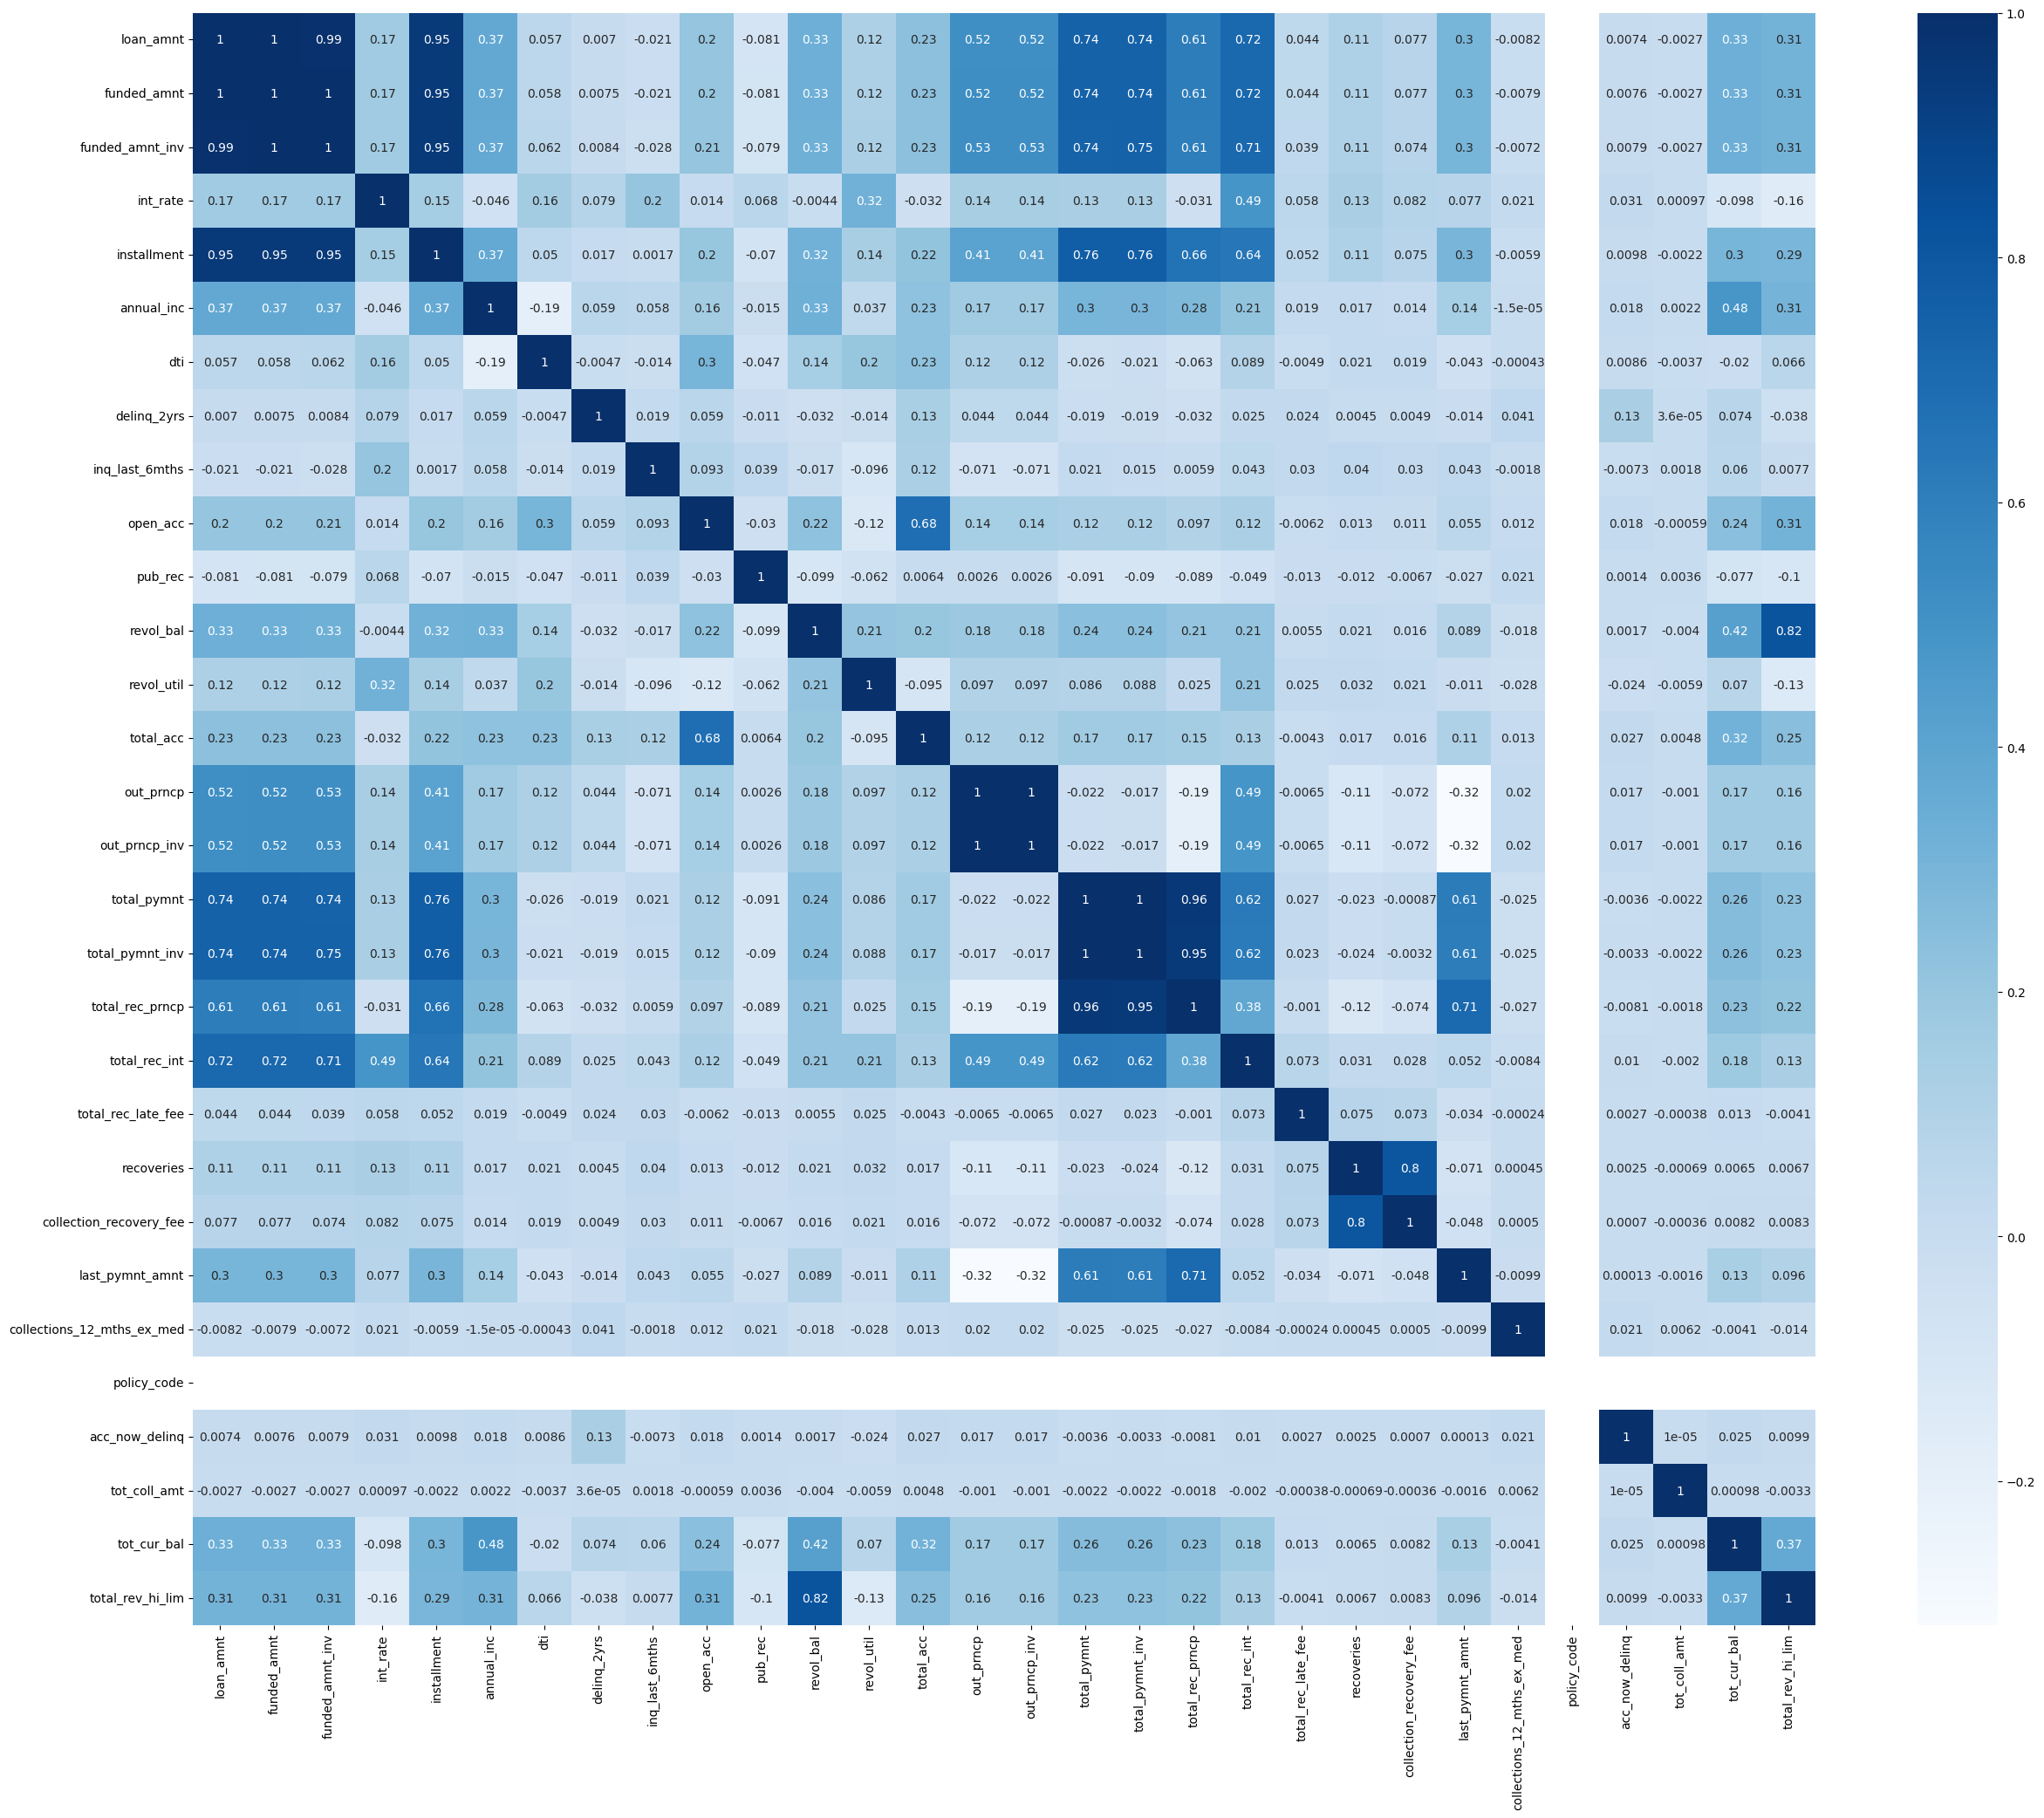

In [19]:
# melihat korelasi pada tiap fitur numerik

df_numeric = X_train.select_dtypes(include=np.number)

plt.figure(figsize=(30, 24))
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True)
plt.show()

In [20]:
corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

print('fitur yang perlu didrop untuk menghindari multicolinearity :')
print(hicorr)

fitur yang perlu didrop untuk menghindari multicolinearity :
['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim']


# Preprocessing

## Feature engineering & selection

In [21]:
# == membuat fungsi mencari selisih bulan data dengan bulan reference ==
def hitung_mths_since_(df, reference_date='2024-12-01', fitur_asal='earliest_cr_line', new_feature_name='mths_since_earliest_cr_line'):
    df = df.copy()

    # Membuat fitur dengan format tanggal dari fitur asal
    df['feature_date'] = pd.to_datetime(df[fitur_asal], format='%b-%y', errors='coerce')
    
    # Konversi reference date ke datetime
    reference_date = pd.to_datetime(reference_date)
    
    # Hitung selisih bulan 
    df[new_feature_name] = (
        (reference_date.year - df['feature_date'].dt.year) * 12 +
        (reference_date.month - df['feature_date'].dt.month)
    ).round()
    
    # Hitung jumlah data dengan nilai negatif
    negative_count = len(df[df[new_feature_name] < 0])
    
    return df, negative_count

def feature_engineering(df):
    df = df.copy()

    # == membuat fitur baru dari earliest_cr_line dengan fungsi hitung_mths_since_ ==
    df, negative_count = hitung_mths_since_(df, fitur_asal='earliest_cr_line',  new_feature_name='mths_since_earliest_cr_line')

    df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max() # mengubah data negatif pada fitur tersebut menjadi nilai max

    df.drop(['earliest_cr_line', 'feature_date'], axis=1, inplace=True)

    # == membuat fitur baru dari issue_d dengan fungsi hitung_mths_since_ ==
    df, negative_count = hitung_mths_since_(df, fitur_asal='issue_d',  new_feature_name='mths_since_issue_d')

    df.drop(['issue_d', 'feature_date'], axis=1, inplace=True)

    # == membuat fitur baru dari last_pymnt_d dengan fungsi hitung_mths_since_ ==
    df, negative_count = hitung_mths_since_(df, fitur_asal='last_pymnt_d',  new_feature_name='mths_since_last_pymnt_d')

    df.drop(['last_pymnt_d', 'feature_date'], axis=1, inplace=True)

    # == membuat fitur baru dari last_credit_pull_d dengan fungsi hitung_mths_since_ ==
    df, negative_count = hitung_mths_since_(df, fitur_asal='last_credit_pull_d',  new_feature_name='mths_since_last_credit_pull_d')

    df.drop(['last_credit_pull_d', 'feature_date'], axis=1, inplace=True)

    return df

def feature_selection(df, hicorr):
    df = df.copy()

    # == mendrop salah satu fitur dengan korelasi tinggi untuk menghindari multicolinearity dengan threshold 0.7 ==
    df.drop(columns=[col for col in hicorr if col in df.columns], inplace=True)

    # drop features with high cardinality
    df.drop(['url','emp_title', 'title','zip_code'], axis=1, inplace=True)

    # drop features with 1 unique value
    df.drop(['application_type','policy_code'], axis=1, inplace=True)

    # drop features with dominated 1 unique value
    df.drop('pymnt_plan', axis=1, inplace=True)

    return df


In [22]:
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

X_train = feature_selection(X_train, hicorr)
X_test = feature_selection(X_test, hicorr)

In [23]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d'],
      dtype='object')

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 404301 to 12958
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      373028 non-null  int64  
 1   term                           373028 non-null  object 
 2   int_rate                       373028 non-null  float64
 3   grade                          373028 non-null  object 
 4   sub_grade                      373028 non-null  object 
 5   emp_length                     356287 non-null  object 
 6   home_ownership                 373028 non-null  object 
 7   annual_inc                     373025 non-null  float64
 8   verification_status            373028 non-null  object 
 9   purpose                        373028 non-null  object 
 10  addr_state                     373028 non-null  object 
 11  dti                            373028 non-null  float64
 12  delinq_2yrs                    

chi square -- done
missing value -- done
outlier -- done
smotenc

xgboost
evaluation
fox
evaluation


In [25]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [26]:
# melihat korelasi fitur kategorik terhadap fitur target dengan chi-square
categoric = train_data.select_dtypes('object')

# Create an empty DataFrame to store the chi-square results
chi_square_results = pd.DataFrame(columns=['Feature', 'Chi-Square', 'P-Value'])

# Calculate chi-square for each categorical feature
for feature in categoric:
    contingency_table = pd.crosstab(train_data[feature], train_data['bad_loan'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Create a temporary DataFrame and concatenate it to the results DataFrame
    temp_df = pd.DataFrame({'Feature': [feature], 'Chi-Square': [chi2], 'P-Value': [p]})
    chi_square_results = pd.concat([chi_square_results, temp_df], ignore_index=True)

# Save the results to a CSV file
chi_square_results.to_csv('chi_square_results.csv', index=False)

# Print the chi-square result Ordered by strongest Correlation
chi_square_results = pd.read_csv('chi_square_results.csv')
chi_square_results = chi_square_results.sort_values(by=['P-Value'], ascending=True)

# Adding correlation column in chi square result
chi_square_results['Correlation'] = chi_square_results['P-Value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
chi_square_results.to_csv('chi_square_results.csv', index=False)
chi_square_results_final = pd.read_csv('chi_square_results.csv')
chi_square_results_final

,Feature,Chi-Square,P-Value,Correlation
0,term,1748.562045,0.000000e+00,Significant
1,grade,10467.405770,0.000000e+00,Significant
2,sub_grade,11056.856221,0.000000e+00,Significant
3,purpose,1292.812746,1.868727e-268,Significant
4,verification_status,916.517170,9.568088e-200,Significant
5,home_ownership,773.634069,5.845230e-165,Significant
6,initial_list_status,512.859731,1.513639e-113,Significant
7,addr_state,448.402048,6.579836e-66,Significant
8,emp_length,142.048885,1.602125e-25,Significant


## Handle missing value

In [27]:
# cek berapa persen nilai null pada fitur yang memiliki missing value
check_missing2_train = train_data.isnull().sum() * 100 / train_data.shape[0]
print("train_data :")
print(check_missing2_train[check_missing2_train > 0].sort_values(ascending=False))

check_missing2_test = test_data.isnull().sum() * 100 / test_data.shape[0]
print("\n test_data :")
print(check_missing2_test[check_missing2_test > 0].sort_values(ascending=False))


train_data :
tot_coll_amt                     15.064821
tot_cur_bal                      15.064821
emp_length                        4.487867
mths_since_last_pymnt_d           0.078546
revol_util                        0.073453
collections_12_mths_ex_med        0.031633
mths_since_last_credit_pull_d     0.009383
delinq_2yrs                       0.006166
pub_rec                           0.006166
inq_last_6mths                    0.006166
open_acc                          0.006166
acc_now_delinq                    0.006166
total_acc                         0.006166
mths_since_earliest_cr_line       0.006166
annual_inc                        0.000804
dtype: float64

 test_data :
tot_coll_amt                     15.098062
tot_cur_bal                      15.098062
emp_length                        4.575528
mths_since_last_pymnt_d           0.089001
revol_util                        0.070772
collections_12_mths_ex_med        0.028952
mths_since_last_credit_pull_d     0.007506
delinq_2yrs 

In [28]:
# cek berapa banyak baris data yang missing value pada fitur dibawah 5%
features_below_5_train = check_missing2_train[(check_missing2_train > 0) & (check_missing2_train < 5)].index
print('banyak baris data yang missing value pada fitur dibawah 5% pada X_train :', X_train[features_below_5_train].isnull().sum(axis=1).sum())

features_below_5_test = check_missing2_test[(check_missing2_test > 0) & (check_missing2_test < 5)].index
print('banyak baris data yang missing value pada fitur dibawah 5% pada X_test :', X_test[features_below_5_test].isnull().sum(axis=1).sum())

banyak baris data yang missing value pada fitur dibawah 5% pada X_train : 17625
banyak baris data yang missing value pada fitur dibawah 5% pada X_test : 4493


In [29]:
# drop data fitur dengan missing value dibawah 5%
train_data = train_data.dropna(subset=features_below_5_train)
test_data = test_data.dropna(subset=features_below_5_test)

In [30]:
train_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.013470e+05,3.013470e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000
mean,14452.421822,13.821397,7.435167e+04,17.165700,0.286659,0.805906,11.245097,0.154382,1.635015e+04,56.262961,25.130427,4440.605206,0.654179,84.950684,0.009032,0.003993,1.948345e+02,1.408152e+05,323.686701,135.346896,115.376235,111.057818,0.115240
std,8295.235454,4.362570,5.488878e+04,7.822598,0.801117,1.092801,4.989614,0.500594,2.065238e+04,23.688971,11.592698,6397.610755,5.313111,550.970013,0.106808,0.068204,1.674649e+04,1.521042e+05,83.654523,14.400792,12.872859,9.638597,0.319312
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,157.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.560000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,39.300000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.960250e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12375.000000,13.650000,6.450000e+04,16.820000,0.000000,0.000000,10.000000,0.000000,1.189000e+04,57.700000,24.000000,327.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.700000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.800000,32.000000,7452.885000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.118025e+05,366.000000,141.000000,119.000000,109.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.560703e+06,366.600000,156.000000,31898.770000,358.680000,31900.520000,20.000000,5.000000,9.152545e+06,4.772549e+06,671.000000,208.000000,204.000000,208.000000,1.000000


akan diisi dengan median

In [31]:
# handle missing value dengan imputasi median
train_data["tot_coll_amt"].fillna(train_data["tot_coll_amt"].median(), inplace=True)
test_data["tot_coll_amt"].fillna(train_data["tot_coll_amt"].median(), inplace=True)

train_data["tot_cur_bal"].fillna(train_data["tot_cur_bal"].median(), inplace=True)
test_data["tot_cur_bal"].fillna(train_data["tot_cur_bal"].median(), inplace=True)

In [32]:
print(train_data.isna().any())
print(test_data.isna().any())

loan_amnt                        False
term                             False
int_rate                         False
grade                            False
sub_grade                        False
emp_length                       False
home_ownership                   False
annual_inc                       False
verification_status              False
purpose                          False
addr_state                       False
dti                              False
delinq_2yrs                      False
inq_last_6mths                   False
open_acc                         False
pub_rec                          False
revol_bal                        False
revol_util                       False
total_acc                        False
initial_list_status              False
out_prncp                        False
total_rec_late_fee               False
recoveries                       False
collections_12_mths_ex_med       False
acc_now_delinq                   False
tot_coll_amt             

In [33]:
train_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000
mean,14452.421822,13.821397,7.435167e+04,17.165700,0.286659,0.805906,11.245097,0.154382,1.635015e+04,56.262961,25.130427,4440.605206,0.654179,84.950684,0.009032,0.003993,1.650947e+02,1.321819e+05,323.686701,135.346896,115.376235,111.057818,0.115240
std,8295.235454,4.362570,5.488878e+04,7.822598,0.801117,1.092801,4.989614,0.500594,2.065238e+04,23.688971,11.592698,6397.610755,5.313111,550.970013,0.106808,0.068204,1.541565e+04,1.414849e+05,83.654523,14.400792,12.872859,9.638597,0.319312
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,157.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.560000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,39.300000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.480100e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12375.000000,13.650000,6.450000e+04,16.820000,0.000000,0.000000,10.000000,0.000000,1.189000e+04,57.700000,24.000000,327.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.700000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.800000,32.000000,7452.885000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.872590e+05,366.000000,141.000000,119.000000,109.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.560703e+06,366.600000,156.000000,31898.770000,358.680000,31900.520000,20.000000,5.000000,9.152545e+06,4.772549e+06,671.000000,208.000000,204.000000,208.000000,1.000000


In [34]:
test_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000
mean,14465.636118,13.817512,7.460744e+04,17.173191,0.285116,0.806643,11.263488,0.155145,1.647175e+04,56.400580,25.121594,4428.352167,0.666118,87.903127,0.008872,0.004098,139.968295,1.334130e+05,323.665728,135.361079,115.382819,111.032707,0.115368
std,8300.222233,4.348670,5.824261e+04,7.808347,0.792545,1.088447,5.025732,0.520838,2.164257e+04,23.855813,11.619328,6393.666033,5.227700,566.217440,0.113739,0.071219,1381.998516,1.469496e+05,83.821519,14.351748,12.829973,9.575121,0.319468
min,500.000000,5.420000,4.080000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,159.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.550000e+04,11.330000,0.000000,0.000000,8.000000,0.000000,6.541000e+03,39.700000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.479250e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12500.000000,13.660000,6.480000e+04,16.800000,0.000000,0.000000,10.000000,0.000000,1.189850e+04,57.700000,24.000000,272.560000,0.000000,0.000000,0.000000,0.000000,0.000000,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.290000,9.000000e+04,22.720000,0.000000,1.000000,14.000000,0.000000,2.059025e+04,75.000000,32.000000,7442.760000,0.000000,0.000000,0.000000,0.000000,0.000000,1.889330e+05,366.000000,141.000000,120.000000,109.000000,0.000000
max,35000.000000,26.060000,6.100000e+06,39.990000,21.000000,18.000000,76.000000,49.000000,2.568995e+06,892.300000,105.000000,32160.380000,294.680000,33520.270000,16.000000,5.000000,95806.000000,8.000078e+06,671.000000,208.000000,203.000000,208.000000,1.000000


## Handle outlier

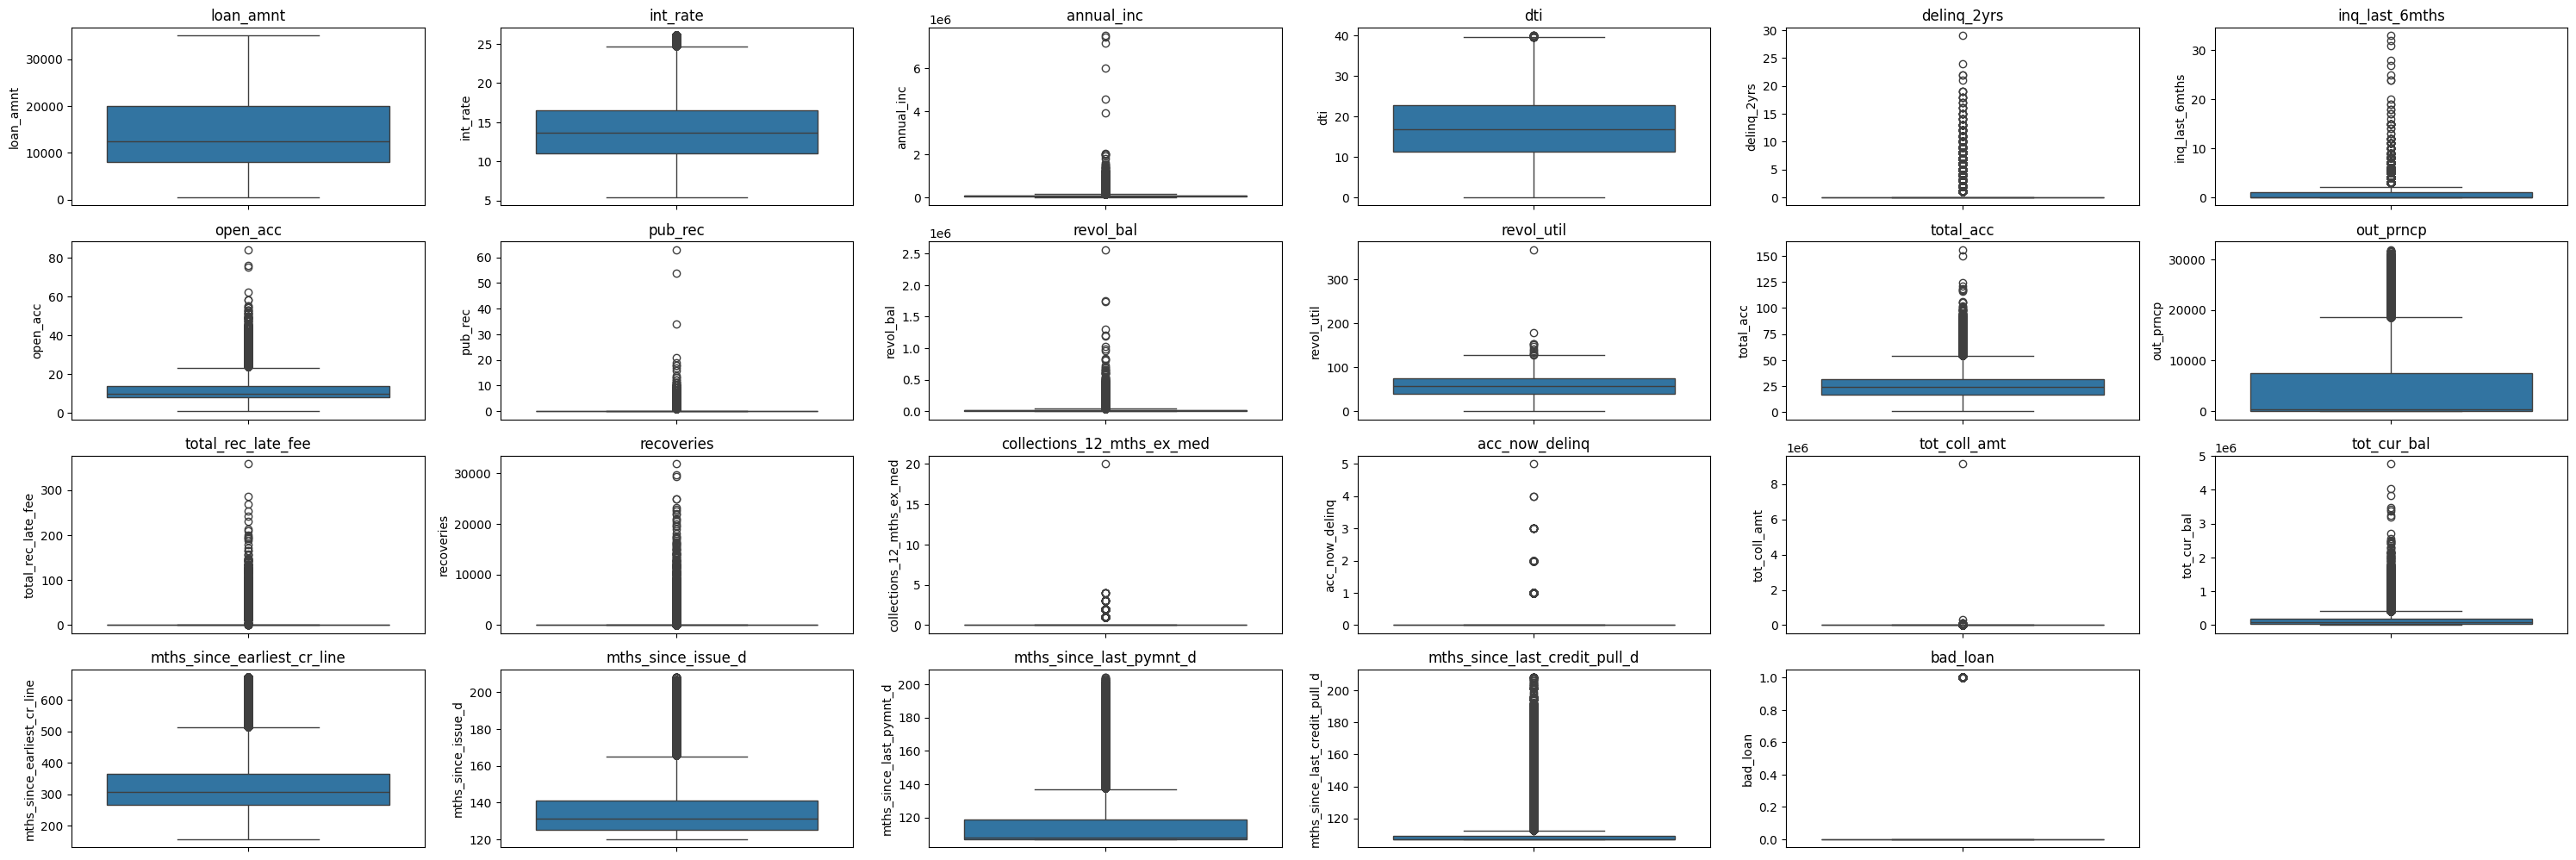

In [35]:
# cek outlier pada train_data
col_num1 = train_data.select_dtypes(exclude='object')
col_cat1 = train_data.select_dtypes(include='object')

col1 = col_num1.columns
plt.figure(figsize=(30, 15))
for i in range(len(col1)):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=col_num1[col1[i]])
    plt.title(col1[i])
    plt.tight_layout()
plt.show()

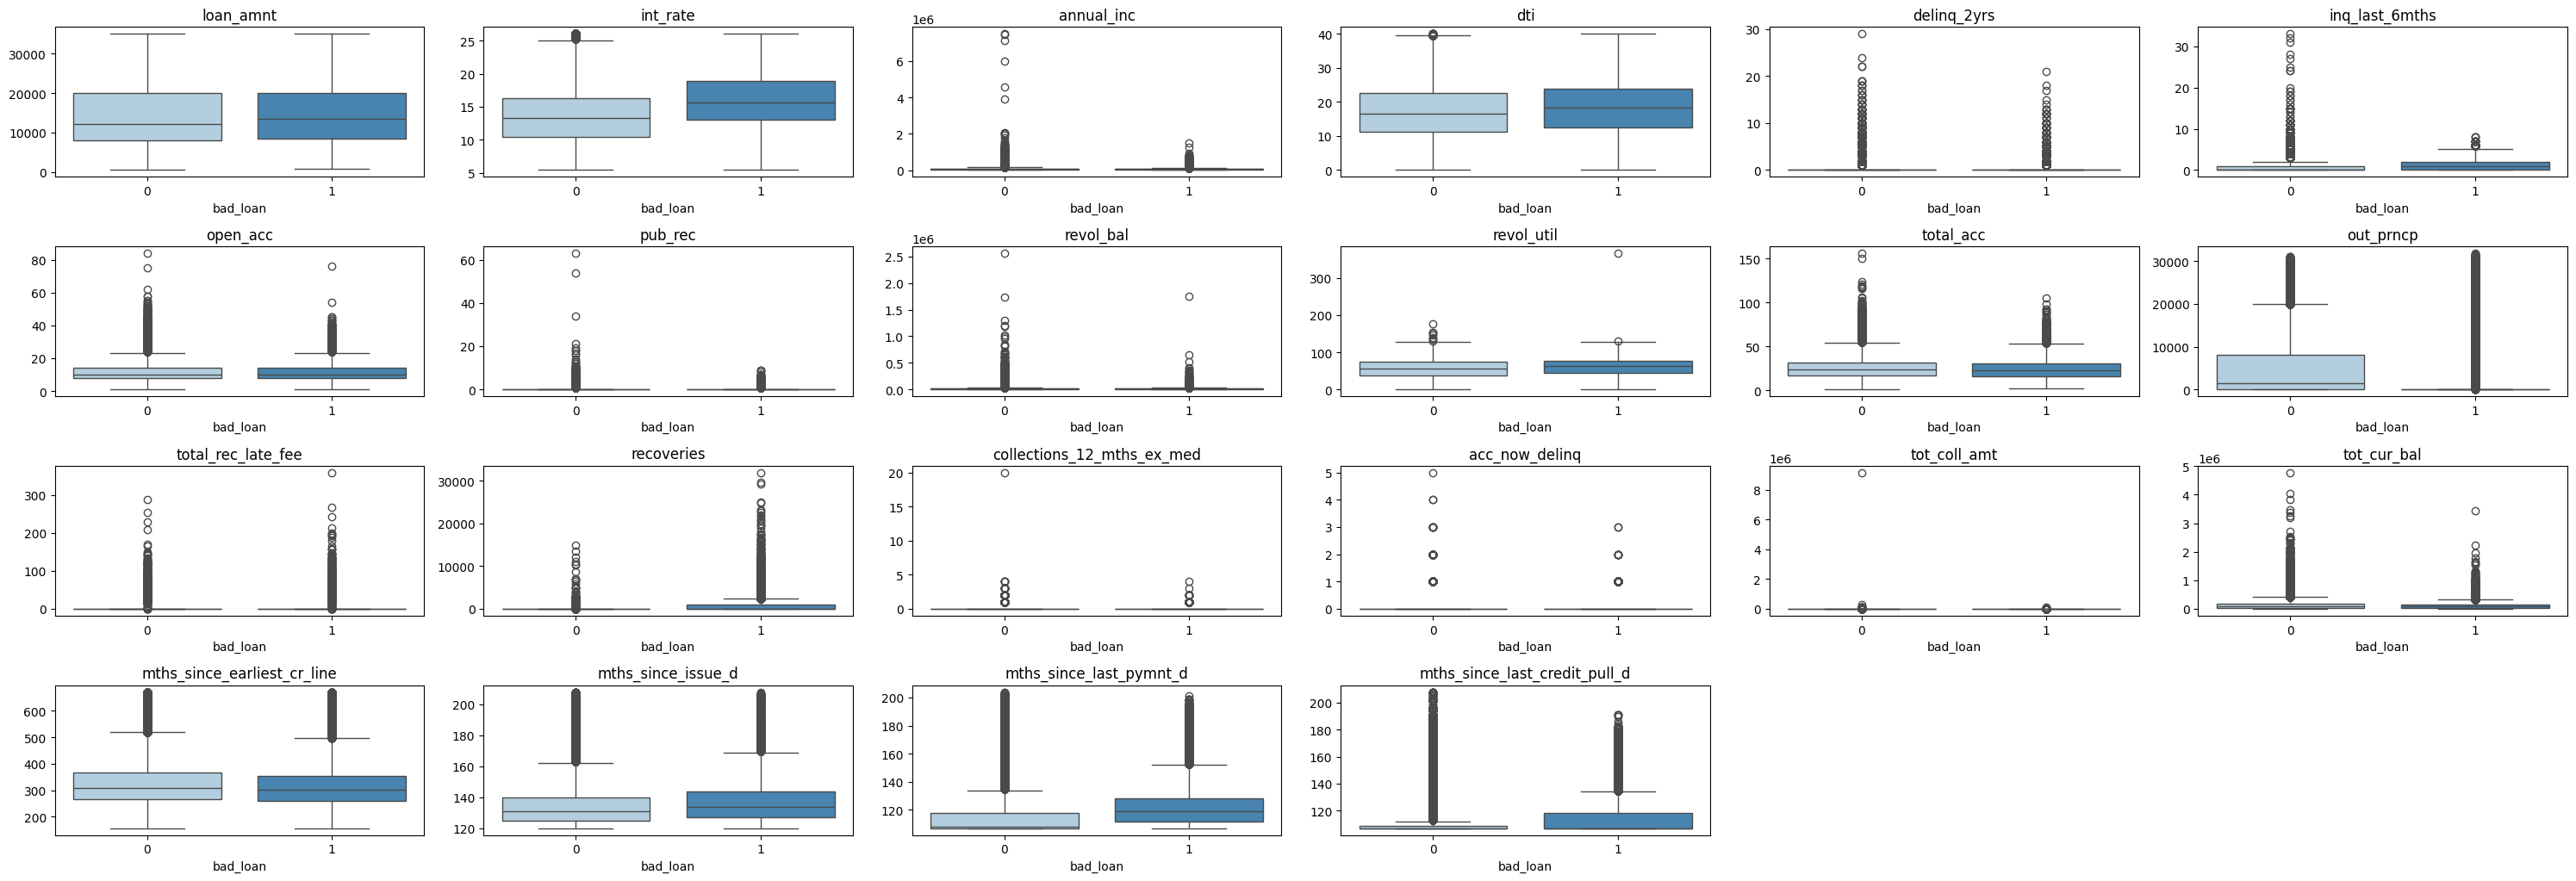

In [36]:
col_num = train_data.select_dtypes(exclude='object').columns.drop('bad_loan', errors='ignore')

plt.figure(figsize=(30, 15))

for i, col in enumerate(col_num):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(x='bad_loan', y=col, data=train_data, palette='Blues')
    plt.title(col)
    plt.xlabel('bad_loan')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


In [37]:
def outliers(data, threshold=1.5, bounds=None, remove=False):
    if bounds is None:
        # Hitung batas dari data sendiri (biasanya untuk train_data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
    else:
        # Gunakan batas dari data lain (misalnya dari train_data)
        lower_bound, upper_bound = bounds

    outliers_mask = (data < lower_bound) | (data > upper_bound)
    num_outliers = np.sum(outliers_mask)

    if remove:
        return outliers_mask
    else:
        return num_outliers, (lower_bound, upper_bound)

bounds_dict = {}  # untuk menyimpan batas dari train_data

print('Jumlah outlier pada train_data:')
for col in col_num1:
    num_out, bounds = outliers(train_data[col])  # hitung dan simpan batas
    bounds_dict[col] = bounds
    print(f"{col}: {num_out}")

# Sekarang, gunakan batas dari train_data untuk cek di test_data
print('\nJumlah outlier pada test_data:')
for col in col_num1:
    num_out_test, _ = outliers(test_data[col], bounds=bounds_dict[col])
    print(f"{col}: {num_out_test}")


Jumlah outlier pada train_data:
loan_amnt: 0
int_rate: 3800
annual_inc: 14952
dti: 116
delinq_2yrs: 63965
inq_last_6mths: 28165
open_acc: 8097
pub_rec: 45027
revol_bal: 17435
revol_util: 12
total_acc: 6648
out_prncp: 17287
total_rec_late_fee: 8146
recoveries: 18312
collections_12_mths_ex_med: 2978
acc_now_delinq: 1322
tot_coll_amt: 37754
tot_cur_bal: 15898
mths_since_earliest_cr_line: 10784
mths_since_issue_d: 18275
mths_since_last_pymnt_d: 25154
mths_since_last_credit_pull_d: 71527
bad_loan: 40983

Jumlah outlier pada test_data:
loan_amnt: 0
int_rate: 885
annual_inc: 3822
dti: 27
delinq_2yrs: 15904
inq_last_6mths: 6980
open_acc: 2063
pub_rec: 11260
revol_bal: 4430
revol_util: 6
total_acc: 1688
out_prncp: 4370
total_rec_late_fee: 2085
recoveries: 4672
collections_12_mths_ex_med: 722
acc_now_delinq: 333
tot_coll_amt: 9327
tot_cur_bal: 4069
mths_since_earliest_cr_line: 2709
mths_since_issue_d: 4528
mths_since_last_pymnt_d: 6256
mths_since_last_credit_pull_d: 17815
bad_loan: 10247


In [38]:
train_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000
mean,14452.421822,13.821397,7.435167e+04,17.165700,0.286659,0.805906,11.245097,0.154382,1.635015e+04,56.262961,25.130427,4440.605206,0.654179,84.950684,0.009032,0.003993,1.650947e+02,1.321819e+05,323.686701,135.346896,115.376235,111.057818,0.115240
std,8295.235454,4.362570,5.488878e+04,7.822598,0.801117,1.092801,4.989614,0.500594,2.065238e+04,23.688971,11.592698,6397.610755,5.313111,550.970013,0.106808,0.068204,1.541565e+04,1.414849e+05,83.654523,14.400792,12.872859,9.638597,0.319312
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,157.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.560000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,39.300000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.480100e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12375.000000,13.650000,6.450000e+04,16.820000,0.000000,0.000000,10.000000,0.000000,1.189000e+04,57.700000,24.000000,327.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.700000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.800000,32.000000,7452.885000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.872590e+05,366.000000,141.000000,119.000000,109.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.560703e+06,366.600000,156.000000,31898.770000,358.680000,31900.520000,20.000000,5.000000,9.152545e+06,4.772549e+06,671.000000,208.000000,204.000000,208.000000,1.000000


In [39]:
def cap_outliers_iqr(df, cols=None, threshold=3.0):
    df_capped = df.copy()
    bounds_dict = {}

    # Kalau kolom tidak ditentukan, ambil semua numerik
    if cols is None:
        cols = df_capped.select_dtypes(exclude='object').columns

        # Hitung batas bawah & atas berdasarkan IQR
        q1 = np.percentile(df_capped[col], 25)
        q3 = np.percentile(df_capped[col], 75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Simpan batas untuk test_data
        bounds_dict[col] = (lower_bound, upper_bound)

        # Batasi nilai-nilai ekstrem (capping)
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

    return df_capped, bounds_dict


In [40]:
train_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000
mean,14452.421822,13.821397,7.435167e+04,17.165700,0.286659,0.805906,11.245097,0.154382,1.635015e+04,56.262961,25.130427,4440.605206,0.654179,84.950684,0.009032,0.003993,1.650947e+02,1.321819e+05,323.686701,135.346896,115.376235,111.057818,0.115240
std,8295.235454,4.362570,5.488878e+04,7.822598,0.801117,1.092801,4.989614,0.500594,2.065238e+04,23.688971,11.592698,6397.610755,5.313111,550.970013,0.106808,0.068204,1.541565e+04,1.414849e+05,83.654523,14.400792,12.872859,9.638597,0.319312
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,157.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.560000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,39.300000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.480100e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12375.000000,13.650000,6.450000e+04,16.820000,0.000000,0.000000,10.000000,0.000000,1.189000e+04,57.700000,24.000000,327.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.700000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.800000,32.000000,7452.885000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.872590e+05,366.000000,141.000000,119.000000,109.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.560703e+06,366.600000,156.000000,31898.770000,358.680000,31900.520000,20.000000,5.000000,9.152545e+06,4.772549e+06,671.000000,208.000000,204.000000,208.000000,1.000000


In [41]:
print("ukuran train_data sebelum hapus outlier:", train_data.shape)
print("ukuran test_data sebelum hapus outlier:", test_data.shape)

ukuran train_data sebelum hapus outlier: (355631, 32)
ukuran test_data sebelum hapus outlier: (88820, 32)


In [42]:
# capped outlier pada train_data dan test_data

train_data = train_data.copy()
test_data = test_data.copy()

# Tentukan kolom numerik yang akan diproses, kecuali 'bad_loan'
cols_to_cap = [col for col in train_data.select_dtypes(include=[np.number]).columns if col != 'bad_loan']

# Terapkan ke train
train_data, bounds_dict = cap_outliers_iqr(train_data, cols=cols_to_cap, threshold=1.5)

# Terapkan ke test menggunakan batas dari train
for col, (lower, upper) in bounds_dict.items():
    if col in test_data.columns:
        test_data[col] = np.where(test_data[col] < lower, lower, test_data[col])
        test_data[col] = np.where(test_data[col] > upper, upper, test_data[col])

In [43]:
print("ukuran train_data setelah hapus outlier:", train_data.shape)
print("ukuran test_data setelah hapus outlier:", test_data.shape)

ukuran train_data setelah hapus outlier: (355631, 32)
ukuran test_data setelah hapus outlier: (88820, 32)


In [44]:
train_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000,3.556310e+05,3.556310e+05,355631.000000,355631.000000,355631.000000,355631.000000,355631.000000
mean,14452.421822,13.821397,7.435167e+04,17.165700,0.286659,0.805906,11.245097,0.154382,1.635015e+04,56.262961,25.130427,4440.605206,0.654179,84.950684,0.009032,0.003993,1.650947e+02,1.321819e+05,323.686701,135.346896,115.376235,111.057818,0.115240
std,8295.235454,4.362570,5.488878e+04,7.822598,0.801117,1.092801,4.989614,0.500594,2.065238e+04,23.688971,11.592698,6397.610755,5.313111,550.970013,0.106808,0.068204,1.541565e+04,1.414849e+05,83.654523,14.400792,12.872859,9.638597,0.319312
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,157.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.560000e+04,11.340000,0.000000,0.000000,8.000000,0.000000,6.484000e+03,39.300000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.480100e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12375.000000,13.650000,6.450000e+04,16.820000,0.000000,0.000000,10.000000,0.000000,1.189000e+04,57.700000,24.000000,327.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.490000,9.000000e+04,22.700000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.800000,32.000000,7452.885000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.872590e+05,366.000000,141.000000,119.000000,109.000000,0.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.560703e+06,366.600000,156.000000,31898.770000,358.680000,31900.520000,20.000000,5.000000,9.152545e+06,4.772549e+06,671.000000,208.000000,204.000000,208.000000,1.000000


In [45]:
test_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,bad_loan
count,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000,8.882000e+04,88820.000000,88820.000000,88820.000000,88820.000000,88820.000000
mean,14465.636118,13.817512,7.460744e+04,17.173191,0.285116,0.806643,11.263488,0.155145,1.647175e+04,56.400580,25.121594,4428.352167,0.666118,87.903127,0.008872,0.004098,139.968295,1.334130e+05,323.665728,135.361079,115.382819,111.032707,0.115368
std,8300.222233,4.348670,5.824261e+04,7.808347,0.792545,1.088447,5.025732,0.520838,2.164257e+04,23.855813,11.619328,6393.666033,5.227700,566.217440,0.113739,0.071219,1381.998516,1.469496e+05,83.821519,14.351748,12.829973,9.575121,0.319468
min,500.000000,5.420000,4.080000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,159.000000,120.000000,107.000000,107.000000,0.000000
25%,8000.000000,10.990000,4.550000e+04,11.330000,0.000000,0.000000,8.000000,0.000000,6.541000e+03,39.700000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.479250e+04,267.000000,125.000000,107.000000,107.000000,0.000000
50%,12500.000000,13.660000,6.480000e+04,16.800000,0.000000,0.000000,10.000000,0.000000,1.189850e+04,57.700000,24.000000,272.560000,0.000000,0.000000,0.000000,0.000000,0.000000,8.425600e+04,308.000000,131.000000,108.000000,107.000000,0.000000
75%,20000.000000,16.290000,9.000000e+04,22.720000,0.000000,1.000000,14.000000,0.000000,2.059025e+04,75.000000,32.000000,7442.760000,0.000000,0.000000,0.000000,0.000000,0.000000,1.889330e+05,366.000000,141.000000,120.000000,109.000000,0.000000
max,35000.000000,26.060000,6.100000e+06,39.990000,21.000000,18.000000,76.000000,49.000000,2.568995e+06,892.300000,105.000000,32160.380000,294.680000,33520.270000,16.000000,5.000000,95806.000000,8.000078e+06,671.000000,208.000000,203.000000,208.000000,1.000000


## Feature Encode

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355631 entries, 404301 to 12958
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      355631 non-null  int64  
 1   term                           355631 non-null  object 
 2   int_rate                       355631 non-null  float64
 3   grade                          355631 non-null  object 
 4   sub_grade                      355631 non-null  object 
 5   emp_length                     355631 non-null  object 
 6   home_ownership                 355631 non-null  object 
 7   annual_inc                     355631 non-null  float64
 8   verification_status            355631 non-null  object 
 9   purpose                        355631 non-null  object 
 10  addr_state                     355631 non-null  object 
 11  dti                            355631 non-null  float64
 12  delinq_2yrs                    

In [47]:
# label encode
categorical_cols = [
    'term',
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'verification_status',
    'purpose',
    'addr_state',
    'initial_list_status',
]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()

    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

    encoders[col] = le

for col, le in encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping untuk kolom '{col}':")
    print(mapping)
    print("-" * 40)

Mapping untuk kolom 'term':
{' 36 months': np.int64(0), ' 60 months': np.int64(1)}
----------------------------------------
Mapping untuk kolom 'grade':
{'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6)}
----------------------------------------
Mapping untuk kolom 'sub_grade':
{'A1': np.int64(0), 'A2': np.int64(1), 'A3': np.int64(2), 'A4': np.int64(3), 'A5': np.int64(4), 'B1': np.int64(5), 'B2': np.int64(6), 'B3': np.int64(7), 'B4': np.int64(8), 'B5': np.int64(9), 'C1': np.int64(10), 'C2': np.int64(11), 'C3': np.int64(12), 'C4': np.int64(13), 'C5': np.int64(14), 'D1': np.int64(15), 'D2': np.int64(16), 'D3': np.int64(17), 'D4': np.int64(18), 'D5': np.int64(19), 'E1': np.int64(20), 'E2': np.int64(21), 'E3': np.int64(22), 'E4': np.int64(23), 'E5': np.int64(24), 'F1': np.int64(25), 'F2': np.int64(26), 'F3': np.int64(27), 'F4': np.int64(28), 'F5': np.int64(29), 'G1': np.int64(30), 'G2': np.int64(31), 'G3': np.int64(

In [57]:
# ganti tipe data kategorik menjadi 'category'
for col in categorical_cols:
    train_data[col] = train_data[col].astype("category")
    test_data[col] = test_data[col].astype("category")

In [58]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 355631 entries, 404301 to 12958
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   loan_amnt                      355631 non-null  int64   
 1   term                           355631 non-null  category
 2   int_rate                       355631 non-null  float64 
 3   grade                          355631 non-null  category
 4   sub_grade                      355631 non-null  category
 5   emp_length                     355631 non-null  category
 6   home_ownership                 355631 non-null  category
 7   annual_inc                     355631 non-null  float64 
 8   verification_status            355631 non-null  category
 9   purpose                        355631 non-null  category
 10  addr_state                     355631 non-null  category
 11  dti                            355631 non-null  float64 
 12  delinq_2yrs      

## Handle imbalance SMOTENC

In [59]:
X_train = train_data.drop('bad_loan', axis=1)
y_train = train_data['bad_loan']

X_test = test_data.drop('bad_loan', axis=1)
y_test = test_data['bad_loan']

In [60]:
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

bad_loan
0    88.475977
1    11.524023
Name: proportion, dtype: float64
bad_loan
0    88.463184
1    11.536816
Name: proportion, dtype: float64


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355631 entries, 404301 to 12958
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   loan_amnt                      355631 non-null  int64   
 1   term                           355631 non-null  category
 2   int_rate                       355631 non-null  float64 
 3   grade                          355631 non-null  category
 4   sub_grade                      355631 non-null  category
 5   emp_length                     355631 non-null  category
 6   home_ownership                 355631 non-null  category
 7   annual_inc                     355631 non-null  float64 
 8   verification_status            355631 non-null  category
 9   purpose                        355631 non-null  category
 10  addr_state                     355631 non-null  category
 11  dti                            355631 non-null  float64 
 12  delinq_2yrs      

In [62]:
# smotenc
categorical_features = X_train.select_dtypes(include=["category"]).columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

In [67]:
print(y_train_smote.value_counts(normalize=True)*100)

bad_loan
0    50.0
1    50.0
Name: proportion, dtype: float64


# Modeling

In [68]:
model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

model_smote = XGBClassifier(enable_categorical=True)
model_smote.fit(X_train_smote, y_train_smote)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


# Evaluation

In [71]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

print("\nWithout SMOTE (macro averaging):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro", zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average="macro", zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average="macro", zero_division=0))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba, average="macro"))

print("\nWith SMOTE (macro averaging):")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote, average="macro", zero_division=0))
print("Recall:", recall_score(y_test, y_pred_smote, average="macro", zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_smote, average="macro"))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

Without SMOTE:
Accuracy: 0.9553141184417924
Precision: 0.9246482683982684
Recall: 0.6670244949741387
F1 Score: 0.7749872441748399
ROC AUC Score: 0.9587972188319216

With SMOTE:
Accuracy: 0.95579824363882
Precision: 0.9278462163259781
Recall: 0.6688786962037669
F1 Score: 0.7773619144833843
ROC AUC Score: 0.9586578438858046

Without SMOTE (macro averaging):
Accuracy: 0.9553141184417924
Precision: 0.9413731099814204
Recall: 0.8299677729220152
F1 Score: 0.8750905746064668
ROC AUC Score: 0.9587972188319216

With SMOTE (macro averaging):
Accuracy: 0.95579824363882
Precision: 0.9430900306636951
Recall: 0.8310475977550722
F1 Score: 0.876412667302565
ROC AUC Score: 0.9586578438858046


# Hyperparameter tuning FOX

Early stopping at iteration 11 due to no significant improvement.

Hyperparameters terbaik untuk XGBoost:
n_estimators: 10.798078914840866
learning_rate: 0.07002353814456067
min_child_weight: 1.8440798145685389
max_depth: 1.0
max_delta_step: 0.10357797302440436
subsample: 0.3705280903568005
colsample_bytree: 0.1
colsample_bylevel: 0.15033895876695713
reg_lambda: 1e-09
reg_alpha: 0.16264107271367448
gamma: 0.30663215896798346
scale_pos_weight: 0.17682174836929485
Akurasi terbaik: 0.9341396000520502


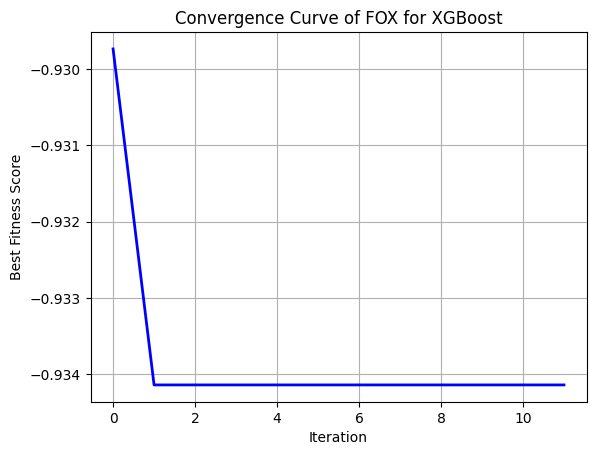


Evaluasi pada XGBoost model terbaik:
Akurasi: 0.8846318396757487
Presisi: 0.0
Recall: 0.0
F1-Score: 0.0
AUC (ROC): 0.7800125808568226

Evaluasi pada XGBoost model terbaik:
Akurasi: 0.8846318396757487
Presisi: 0.4423159198378743
Recall: 0.5
F1-Score: 0.46939238797321275
AUC (ROC): 0.7800125808568226


In [74]:
# FUNGSI INISIALISASI FOX
def initialization(search_agents_no, dim, ub, lb):
    X = np.zeros((search_agents_no, dim))
    for i in range(dim):
        ub_i = ub[i]
        lb_i = lb[i]
        X[:, i] = np.random.rand(search_agents_no) * (ub_i - lb_i) + lb_i
    return X

# ALGORITMA FOX
def FOX(search_agents_no, max_iter, lb, ub, dim, fobj, tolerance=1e-4, patience=10):
    best_pos = np.zeros(dim)
    best_score = np.inf
    min_t = np.inf

    X = initialization(search_agents_no, dim, ub, lb)
    distance_fox_rat = np.zeros((search_agents_no, dim))

    l = 0
    c1, c2 = 0.18, 0.82
    convergence_curve = []
    no_improvement_counter = 0
    previous_best_score = best_score

    while l < max_iter:
        for i in range(X.shape[0]):
            X[i, :] = np.clip(X[i, :], lb, ub)
            fitness = fobj(X[i, :])
            if fitness < best_score:
                best_score = fitness
                best_pos = X[i, :]

        convergence_curve.append(best_score)

        if abs(previous_best_score - best_score) < tolerance:
            no_improvement_counter += 1
        else:
            no_improvement_counter = 0

        if no_improvement_counter >= patience:
            print(f"Early stopping at iteration {l} due to no significant improvement.")
            break

        previous_best_score = best_score
        a = 2 * (1 - (l / max_iter))
        jump = 0

        for i in range(X.shape[0]):
            r = np.random.rand()
            p = np.random.rand()

            if r >= 0.5:
                if p > 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c1
                elif p <= 0.18:
                    time = np.random.rand(1, dim)
                    sps = best_pos / np.maximum(time, 1e-10)
                    distance_s_travel = sps * time
                    distance_fox_rat[i, :] = 0.5 * distance_s_travel
                    tt = np.sum(time) / dim
                    t = tt / 2
                    jump = 0.5 * 9.81 * t**2
                    X[i, :] = distance_fox_rat[i, :] * jump * c2

                if min_t > tt:
                    min_t = tt

            else:
                ans = best_pos + np.random.randn(1, dim) * (min_t * a)
                X[i, :] = ans

            X[i, :] = np.clip(X[i, :], lb, ub)
        l += 1

    return best_score, best_pos, convergence_curve

# FUNGSI FITNESS UNTUK XGBOOST
def xgb_fitness(params):
    # Ambil parameter sesuai urutan
    n_estimators = int(np.clip(params[0], lb[0], ub[0]))
    learning_rate = float(np.clip(params[1], lb[1], ub[1]))
    min_child_weight = int(np.clip(params[2], lb[2], ub[2]))
    max_depth = int(np.clip(params[3], lb[3], ub[3]))
    max_delta_step = int(np.clip(params[4], lb[4], ub[4]))
    subsample = float(np.clip(params[5], lb[5], ub[5]))
    colsample_bytree = float(np.clip(params[6], lb[6], ub[6]))
    colsample_bylevel = float(np.clip(params[7], lb[7], ub[7]))
    reg_lambda = float(np.clip(params[8], lb[8], ub[8]))
    reg_alpha = float(np.clip(params[9], lb[9], ub[9]))
    gamma = float(np.clip(params[10], lb[10], ub[10]))
    scale_pos_weight = float(np.clip(params[11], lb[11], ub[11]))

    # Buat model XGBoost
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        max_depth=max_depth,
        max_delta_step=max_delta_step,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight,
        enable_categorical=True,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -score  # Karena FOX meminimalkan fitness

# BATAS PARAMETER
lb = [
    10,       # n_estimators
    0.01,     # learning_rate
    1,        # min_child_weight
    1,        # max_depth
    0,        # max_delta_step
    0.1,      # subsample
    0.1,      # colsample_bytree
    0.1,      # colsample_bylevel
    1e-9,     # reg_lambda
    1e-9,     # reg_alpha
    1e-9,     # gamma
    1e-6      # scale_pos_weight
]

ub = [
    5000,     # n_estimators
    1.0,      # learning_rate
    10,       # min_child_weight
    50,       # max_depth
    20,       # max_delta_step
    1.0,      # subsample
    1.0,      # colsample_bytree
    1.0,      # colsample_bylevel
    100.0,    # reg_lambda
    100.0,    # reg_alpha
    0.5,      # gamma
    500.0     # scale_pos_weight
]

# === JALANKAN OPTIMISASI FOX ===
search_agents_no = 15
max_iter = 15
dim = len(lb)

best_score, best_params, convergence_curve = FOX(search_agents_no, max_iter, lb, ub, dim, xgb_fitness)

# === CETAK HASIL ===
print("\nHyperparameters terbaik untuk XGBoost:")
param_names = [
    'n_estimators', 'learning_rate', 'min_child_weight', 'max_depth', 'max_delta_step',
    'subsample', 'colsample_bytree', 'colsample_bylevel',
    'reg_lambda', 'reg_alpha', 'gamma', 'scale_pos_weight'
]
for name, val in zip(param_names, best_params):
    print(f"{name}: {val}")
print("Akurasi terbaik:", -best_score)

# === PLOT KONVERGENSI ===
plt.plot(convergence_curve, color='blue', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Score')
plt.title('Convergence Curve of FOX for XGBoost')
plt.grid(True)
plt.show()

# === EVALUASI MODEL TERBAIK ===
best_model = XGBClassifier(
    n_estimators=int(best_params[0]),
    learning_rate=float(best_params[1]),
    min_child_weight=int(best_params[2]),
    max_depth=int(best_params[3]),
    max_delta_step=int(best_params[4]),
    subsample=float(best_params[5]),
    colsample_bytree=float(best_params[6]),
    colsample_bylevel=float(best_params[7]),
    reg_lambda=float(best_params[8]),
    reg_alpha=float(best_params[9]),
    gamma=float(best_params[10]),
    scale_pos_weight=float(best_params[11]),
    enable_categorical=True,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC (ROC):", auc)

# Evaluasi with average macro
accuracy_avgmacro = accuracy_score(y_test, y_pred)
precision_avgmacro = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall_avgmacro = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1_avgmacro = f1_score(y_test, y_pred, average="macro", zero_division=0)
auc_avgmacro = roc_auc_score(y_test, y_proba)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision_avgmacro)
print("Recall:", recall_avgmacro)
print("F1-Score:", f1_avgmacro)
print("AUC (ROC):", auc_avgmacro)


Early stopping at iteration 12 due to no significant improvement.

Hyperparameters terbaik untuk XGBoost:
n_estimators: 10.087592660423615
learning_rate: 0.01
min_child_weight: 1.0825686303475561
max_depth: 1.1453718071820869
max_delta_step: 0.20284983084991448
subsample: 0.1
colsample_bytree: 0.1
colsample_bylevel: 0.1
reg_lambda: 1e-09
reg_alpha: 1e-09
gamma: 0.03371621641776663
scale_pos_weight: 0.08860217034797234
Akurasi terbaik: 0.9496781786800546


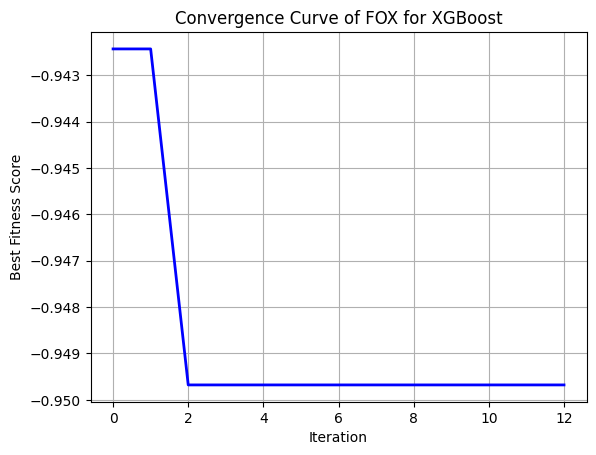


Evaluasi pada XGBoost model terbaik:
Akurasi: 0.8846318396757487
Presisi: 0.0
Recall: 0.0
F1-Score: 0.0
AUC (ROC): 0.7608260302301073

Evaluasi pada XGBoost model terbaik:
Akurasi: 0.8846318396757487
Presisi: 0.4423159198378743
Recall: 0.5
F1-Score: 0.46939238797321275
AUC (ROC): 0.7608260302301073


In [75]:
# === JALANKAN OPTIMISASI FOX pada SMOTE===
search_agents_no = 15
max_iter = 15
dim = len(lb)

best_score, best_params, convergence_curve = FOX(search_agents_no, max_iter, lb, ub, dim, xgb_fitness)

# === CETAK HASIL ===
print("\nHyperparameters terbaik untuk XGBoost:")
param_names = [
    'n_estimators', 'learning_rate', 'min_child_weight', 'max_depth', 'max_delta_step',
    'subsample', 'colsample_bytree', 'colsample_bylevel',
    'reg_lambda', 'reg_alpha', 'gamma', 'scale_pos_weight'
]
for name, val in zip(param_names, best_params):
    print(f"{name}: {val}")
print("Akurasi terbaik:", -best_score)

# === PLOT KONVERGENSI ===
plt.plot(convergence_curve, color='blue', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness Score')
plt.title('Convergence Curve of FOX for XGBoost')
plt.grid(True)
plt.show()

# === EVALUASI MODEL TERBAIK ===
best_model_smote = XGBClassifier(
    n_estimators=int(best_params[0]),
    learning_rate=float(best_params[1]),
    min_child_weight=int(best_params[2]),
    max_depth=int(best_params[3]),
    max_delta_step=int(best_params[4]),
    subsample=float(best_params[5]),
    colsample_bytree=float(best_params[6]),
    colsample_bylevel=float(best_params[7]),
    reg_lambda=float(best_params[8]),
    reg_alpha=float(best_params[9]),
    gamma=float(best_params[10]),
    scale_pos_weight=float(best_params[11]),
    enable_categorical=True,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

best_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = best_model_smote.predict(X_test)
y_proba_smote = best_model_smote.predict_proba(X_test)[:, 1]

# Evaluasi
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
auc = roc_auc_score(y_test, y_proba_smote)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC (ROC):", auc)

# Evaluasi with average macro
accuracy_avgmacro = accuracy_score(y_test, y_pred_smote)
precision_avgmacro = precision_score(y_test, y_pred_smote, average="macro", zero_division=0)
recall_avgmacro = recall_score(y_test, y_pred_smote, average="macro", zero_division=0)
f1_avgmacro = f1_score(y_test, y_pred_smote, average="macro", zero_division=0)
auc_avgmacro = roc_auc_score(y_test, y_proba_smote)

print("\nEvaluasi pada XGBoost model terbaik:")
print("Akurasi:", accuracy)
print("Presisi:", precision_avgmacro)
print("Recall:", recall_avgmacro)
print("F1-Score:", f1_avgmacro)
print("AUC (ROC):", auc_avgmacro)
